## Beer Review Analysis
https://drive.google.com/open?id=1e-kyoB97a5tnE7X4T4Es4FHi4g6Trefq

Questions: 

1. Rank top 3 Breweries which produce the strongest beers?
2. Which year did beers enjoy the highest ratings? 
3. Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?
4. If you were to recommend 3 beers to your friends based on this data which ones will you recommend?
5. Which Beer style seems to be the favorite based on reviews written by users? 
6. How does written review compare to overall review score for the beer styles?
7. How do find similar beer drinkers by using written reviews only?   


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
beer_data = pd.read_csv("D:\evolent\data\BeerDataScienceProject\BeerDataScienceProject.csv", encoding='latin-1', header = 0)

## EDA

In [3]:
beer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [4]:
#Random values in data
beer_data.sample(50)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
219884,7.10,11922,158,Titan IPA,American IPA,4.5,4.5,4.5,4.5,tchenery,4.5,12 oz. bottle to a pint. Nice hazy orange colo...,1282011032
470173,5.60,1591,392,Winter Ale,Winter Warmer,4.0,4.0,4.0,3.5,HopheadEd,4.0,"Nice winter seasonal from Weyerbacher, one of ...",1038724118
123086,5.40,751,273,Sweetwater 420 Extra Pale Ale,American Pale Ale (APA),3.5,3.0,3.0,3.5,OWSLEY069,3.0,Pours a clean pale orange-ish color with an of...,1194094049
335919,5.50,65136,18081,Brougham Bitter,Extra Special / Strong Bitter (ESB),3.5,3.5,4.0,3.5,beertunes,3.5,I've had this brew multiple times and was surp...,1307131549
453103,6.20,39516,590,Organic Revolution,American Pale Ale (APA),4.0,3.5,3.5,3.5,JohnGalt1,3.0,12oz received as extra in a recent trade with ...,1204428413
134504,12.00,34094,5318,Older Viscosity,American Double / Imperial Stout,4.0,4.0,4.5,4.0,akorsak,4.5,A tulip glass at Al's of Hampden. A: Pitch bla...,1301165288
122939,5.40,751,273,Sweetwater 420 Extra Pale Ale,American Pale Ale (APA),3.5,3.5,4.5,4.0,Vonerichs,3.5,The pour from tap was a nice clear gold with m...,1244597165
182010,7.25,3916,396,AleSmith IPA,American IPA,3.5,3.5,3.5,4.0,FtownThrowDown,4.0,Ive had my eye on this one for awhile and fina...,1178661573
23859,9.20,25852,1199,Founders Blushing Monk,Belgian Strong Pale Ale,4.0,4.0,3.5,4.0,TMoney2591,3.5,Served in a Dirty John's tulip pint glass. Vin...,1312592959
192360,9.20,36727,2743,Green Flash Le Freak,Belgian IPA,4.5,4.0,4.0,4.0,RblWthACoz,4.5,Pours a fully fogged in orange with a brown hu...,1219609831


#### Obs- Many review_overall has values less than factors

In [253]:
beer_data[beer_data.review_overall < beer_data[["review_appearance",\
                                         "review_palette","review_taste","review_aroma"]].min(axis=1)].head(2)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
238,8.1,58920,1075,Vas Deferens Ale,Belgian Strong Dark Ale,4.0,3.5,3.0,3.5,oline73,3.5,Poured from a bottle into a pint glass. Appear...,1317093500
261,8.1,58920,1075,Vas Deferens Ale,Belgian Strong Dark Ale,4.0,3.5,3.0,3.5,meatyard,3.5,"The pour, into a Westmalle chalice, is a perfe...",1278714049


### Reviews per beer 

In [254]:
per_beer_reviews = beer_data.beer_name.value_counts()
per_beer_reviews.quantile(q=[0.80,0.90,0.95,0.99,1])

0.80      12.00
0.90      39.00
0.95     106.00
0.99     633.62
1.00    3000.00
Name: beer_name, dtype: float64

In [255]:
#only 916 beers have more than 100 reviews out of 20200 distinct beers
per_beer_reviews[per_beer_reviews.quantile(q=0.95)<per_beer_reviews].count()/beer_data.beer_beerId.nunique()

0.045346534653465345

#### only 916(4%) beers have more than 100 reviews out of 47986 beers

<AxesSubplot:title={'center':'Beers with max reviews'}>

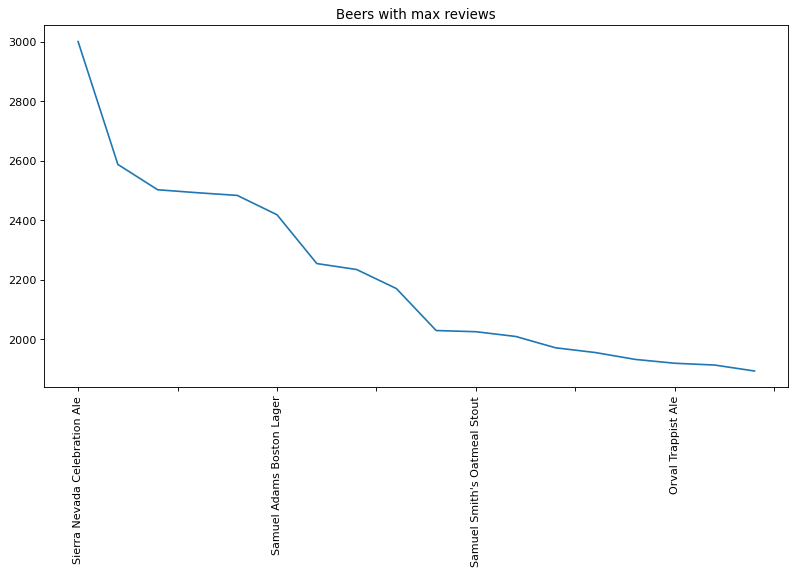

In [248]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)
per_beer_reviews[:(round(per_beer_reviews.shape[0]*0.001))].plot(rot=90, title = "Beers with max reviews")

## Data Cleaning and transformation for initial analysis.

### 1. Filling NA values

In [5]:
b_list = beer_data[beer_data.beer_ABV.isnull()]['beer_beerId'].unique()
count = 0
for b_id in b_list:
    if beer_data[(beer_data.beer_ABV.notnull()) & (beer_data['beer_beerId'] == b_id)].shape[0] >=1 : count+=1
        
print(count)

0


#### Obs - 
    Beers with missing beer_ABV do not have other reviews(data points) where beer_ABV values are present.
    not removing it as other columns have correct values for these data points 

### 2. Converting unix timestamp to readable timestamp

In [3]:
beer_data['review_time'] = pd.to_datetime(beer_data['review_time'],unit='s')

In [4]:
beer_data['review_time'].head(5)

0   2009-02-16 20:57:03
1   2009-03-01 13:44:57
2   2009-03-01 14:10:04
3   2009-02-15 19:12:25
4   2010-12-30 18:53:26
Name: review_time, dtype: datetime64[ns]

### 3. Extracting year from review_time

In [5]:
beer_data['review_year'] = beer_data['review_time'].dt.year

In [6]:
beer_data['review_year'].head(5)

0    2009
1    2009
2    2009
3    2009
4    2010
Name: review_year, dtype: int64

### 4. Remove duplicates

In [7]:
print("Before",beer_data.shape)
beer_data.sort_values('review_overall',ascending= False,inplace=True)
beer_data = beer_data.drop_duplicates(subset=['review_profileName','beer_beerId'],keep = 'first')
print("After",beer_data.shape)

Before (528870, 14)
After (524093, 14)


In [8]:
#Less than one percent data is duplicate
round(((528870-524093)/528870)*100)

1

# Q1. Rank top 3 Breweries which produce the strongest beers?

In [8]:
beer_data.sort_values(by=['beer_ABV'],ascending=False,inplace=True)

In [9]:
top_breweries = beer_data.groupby(['beer_brewerId']).head(1)
top_B = top_breweries.head(3)

In [76]:
top_B

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
0,57.7,73368,6513,Schorschbräu Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,kappldav123,3.5,"New world strongest beer. Very limited, only 3...",2011-09-23 12:28:21,2011
1,27.0,25759,35,Samuel Adams Utopias,American Strong Ale,4.0,4.5,4.5,4.0,deckjohn,4.5,"been a long, long time since i have done a rev...",2006-04-20 00:29:14,2006
2,19.5,61328,16866,Cherry Chocolate Rain,American Double / Imperial Stout,4.5,5.0,5.0,4.5,abecall98,5.0,"Ok, some slight scribbled notes on my phone fr...",2010-10-27 21:47:17,2010


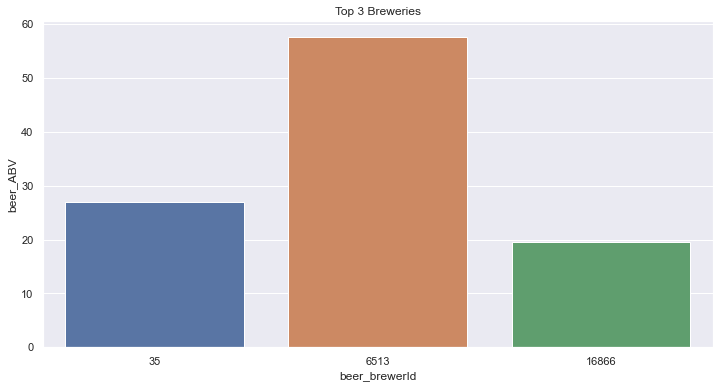

In [42]:
sns.set_theme()
sns.set(rc = {'figure.figsize':(12,6)})
g=sns.barplot(x='beer_brewerId',y='beer_ABV',data=top_B).set_title('Top 3 Breweries')

# Q2. Which year did beers enjoy the highest ratings?

In [43]:
year_grp = beer_data[['review_overall','review_year']].groupby('review_year',).agg(['mean'])

In [49]:
year_result = year_grp.sort_values(('review_overall','mean'),ascending=False).head(5)
year_result.reset_index(inplace=True)

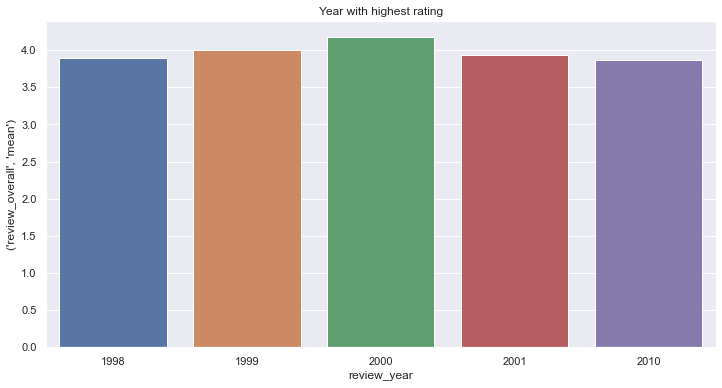

In [60]:
g=sns.barplot(x=year_result['review_year'],y=year_result['review_overall','mean'])\
                .set_title('Year with highest rating')

# Q3. Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

In [62]:
#factors
factors = [ "review_overall","review_appearance","review_palette","review_taste","review_aroma"]

#Correlation matrix 
corr_metrics = beer_data[factors].corr()
corr_metrics.style.background_gradient(cmap='twilight')

,review_overall,review_appearance,review_palette,review_taste,review_aroma
review_overall,1.000000,0.486267,0.601750,0.692217,0.783030
review_appearance,0.486267,1.000000,0.547188,0.554188,0.533646
review_palette,0.601750,0.547188,1.000000,0.603794,0.705715
review_taste,0.692217,0.554188,0.603794,1.000000,0.724914
review_aroma,0.783030,0.533646,0.705715,0.724914,1.000000


# Q4. If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

In [70]:
#Beers with high number of reviews and high overall rating 
beer_grp = beer_data[['beer_name','review_overall']].groupby(['beer_name']).agg(['mean','count'])

In [71]:
recomm_beer = beer_grp.sort_values(([('review_overall','count'),('review_overall','mean')]),ascending=False).head(2)
recomm_beer

review_overall      
                                        mean count
beer_name                                         
Sierra Nevada Celebration Ale       4.172184  2930
Sierra Nevada Pale Ale              4.252375  2526

In [284]:
#A beer with high overall rating with sufficient amount of reviews
beerGrp_rBased = beer_data[['beer_name','review_overall']].groupby(['beer_name']).agg(['mean','count'])

In [289]:
#lets consider 95th percentile of beer's total reviews i.e. 106 to filter beers
beerGrp_rBased[beerGrp_rBased['review_overall','count'] > 106].sort_values(('review_overall','mean'),ascending = False).head(2)

review_overall      
                                  mean count
beer_name                                   
Citra DIPA                    4.630081   246
Cantillon Blåbær Lambik       4.625806   155

#### Ans - I will recommend 2 beers which are popular and have v. good ratings - 
####     1. Sierra Nevada Celebration Ale
####     2. Sierra Nevada Pale Ale	
#### one beer which has sufficient amount of reviews and high ratings -
####     3. Citra DIPA

# 5. Which Beer style seems to be the favorite based on reviews written by users? 

##### After reviewing different review text the observation is, that there is no mention of style of the beer in reviews, which would have been used for analysis.
##### Decided to use whole review for sentiment analysis to understand the review's sentiment. This identified sentiment can be used to find out the favorite Beer style.

### First let's find favorite beer with ratings given by user.

In [9]:
#sorting by time
beer_data.sort_values(by=['review_time'],ascending=True,inplace=True)
beer_data.reset_index(inplace = True, drop = True)

In [103]:
#Beers with high number of reviews and high overall rating 
beerStl_grp = beer_data[['beer_style','review_overall']].groupby(['beer_style']).agg(['mean','count'])

In [104]:
beerStl_grp.sort_values(([('review_overall','count'),('review_overall','mean')]),ascending=False).head(2)

review_overall       
                                         mean  count
beer_style                                          
American IPA                         3.989689  42673
American Double / Imperial IPA       3.951073  25773

### Written Review - Sentiment Analysis

In [2]:
from transformers import pipeline

C:\Users\dhana\miniconda3\envs\evolent_ve\lib\site-packages\torchaudio\backend\utils.py:67: UserWarning: No audio backend is available.
  warnings.warn('No audio backend is available.')


In [3]:
classifier = pipeline('sentiment-analysis', model = 'nlptown/bert-base-multilingual-uncased-sentiment',device=0)

In [23]:
beer_data['sAnalysis_labels'] = ""
beer_data['sa_score'] = "" 

### Clean written reviews

In [94]:
#remove NA
beer_data.dropna(subset=['review_text'], inplace=True)

beer_data.reset_index(inplace = True, drop = True)

In [35]:
# function to remove some sentences from a review as model don't accept very long string.
def reduce_size(review):
    while(len(review) > 2000):
        splited_review = review.split('.')
        review = '.'.join(splited_review[:-1]) 
    return review + '.'

In [36]:
for idx in tqdm(range(beer_data.shape[0])):
    written_review = beer_data.loc[idx, 'review_text']
    if (len(written_review) > 2000): beer_data.loc[idx, 'review_text'] = reduce_size(written_review) 

100%|████████████████████████████████████████████████████████████████████████| 523976/523976 [03:57<00:00, 2204.49it/s]


In [39]:
##########################writing data to save changes##########################
beer_data.to_csv('data/cleaned_df.csv',index=False)
beer_data = pd.read_csv('data/cleaned_df.csv', encoding='latin-1', header = 0)

In [54]:
#convert all Scores having value < 3 to negative and > 3 to positive.
beer_data['rOverall_labels'] = beer_data['review_overall'].copy()
set_val = {0.0:"NEGATIVE",1.0:"NEGATIVE",1.5:"NEGATIVE",2.0:"NEGATIVE",2.5:"NEGATIVE",3.0:"NEUTRAL",3.5:"POSITIVE",4.0:"POSITIVE",4.5:"POSITIVE",5.0:"POSITIVE"}
beer_data = beer_data.replace({'rOverall_labels':set_val})
beer_data['rOverall_labels'] = beer_data['rOverall_labels'].astype('category')

In [55]:
beer_data['rOverall_labels'].value_counts()

POSITIVE    433336
NEUTRAL      53213
NEGATIVE     37427
Name: rOverall_labels, dtype: int64

In [67]:
#download all english stop words using nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

import pickle
import os
from tqdm import tqdm
import re

In [68]:
#functions to remove special charachers and html tags

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [70]:
# removing  punctuation, non english words and top words

i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
comm_words = ['presentation', 'appearance', 'smell', 'taste', 'notes']
s=''
for sent in tqdm(beer_data['review_text'].values):
    filtered_sentence=[]
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if((cleaned_words.lower() not in stop) & (cleaned_words.lower() not in comm_words)):
                    s= (sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (beer_data['rOverall_labels'].values)[i] == 'POSITIVE': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(beer_data['rOverall_labels'].values)[i] == 'NEGATIVE':
                        all_negative_words.append(s) #list of all words used to describe negative reviews
                else:
                    continue
            else:
                continue 
    str1 = b" ".join(filtered_sentence) #final string of cleaned words

    final_string.append(str1)
    i+=1

#Store data into csv file 
beer_data['cleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
beer_data['cleanedText']=beer_data['cleanedText'].str.decode("utf-8")

with open('positive_words.pkl', 'wb') as f:
    pickle.dump(all_positive_words, f)
with open('negitive_words.pkl', 'wb') as f:
    pickle.dump(all_negative_words, f)

100%|█████████████████████████████████████████████████████████████████████████| 523976/523976 [17:24<00:00, 501.82it/s]


In [122]:
#This will remove data points which dont have written reviews as well as very small review.
print('Before',beer_data.shape)
beer_data = beer_data[beer_data['cleanedText'].str.len() > 10] 
print('After',beer_data.shape)

Before (523976, 18)
After (523868, 18)


In [126]:
beer_data.reset_index(inplace = True, drop = True)

In [ ]:
########################## writing data to save changes ##########################
#Saving after text cleaning
beer_data.to_csv('data/text_cleaned_df.csv',index=False)

In [5]:
import torch
import time
torch.cuda.is_available()

True

In [8]:
beer_data['sAnalysis_labels'] = ""
beer_data['sa_score'] = ""
beer_data['predicted_rating'] = ""

In [10]:
#Sentiment Analysis
for idx in tqdm(range(beer_data.shape[0])):
    results = classifier(beer_data.loc[idx, 'cleanedText'])
    
    #get predicted ratings
    predicted_rating = int(results[0]['label'].split(' ')[0])
    label = 'POSITIVE' if predicted_rating > 3 else 'NEGATIVE' if predicted_rating < 3 else 'NEUTRAL'
    beer_data.loc[idx, 'sAnalysis_labels'] = label
    
    #store predicted rating
    beer_data.loc[idx,'predicted_rating'] = predicted_rating
    
    #get score
    beer_data.loc[idx, 'sa_score'] = round(results[0]['score'],2)
    #maxLabelScore = max(results[0], key=lambda x:x['score'])

########################## writing data to save changes ##########################    
beer_data.to_csv('data/cleaned_df_SA.csv',index=False)

100%|████████████████████████████████████████████████████████████████████████| 523868/523868 [5:54:44<00:00, 24.61it/s]


### Finding favorite beer style with predicted ratings

In [6]:
#Read data with sentiment analysis
beer_data = pd.read_csv('data/cleaned_df_SA.csv', header = 0)

In [7]:
beer_data['predicted_rating'] = beer_data['predicted_rating'].astype(float)

In [52]:
#Beers style with high number of reviews and high predicted rating 
beerStl_grp = beer_data[['beer_style','predicted_rating']].groupby(['beer_style']).agg(['mean','count'])

In [53]:
beerStl_grp.sort_values(([('predicted_rating','count'),('predicted_rating','mean')]),ascending=False).head(2)

predicted_rating       
                                           mean  count
beer_style                                            
American IPA                           3.603272  42664
American Double / Imperial IPA         3.519635  25770

# Q6. How does written review compare to overall review score for the beer styles?

In [92]:
#Select few popular beer styles and compare there overall review and written review
stl_list = list(beer_data['beer_style'].value_counts()[:4].index)

In [8]:
import warnings
warnings.filterwarnings("ignore")

###  'rOverall_labels' is derived from 'review_overall' and 'sAnalysis_labels' from 'predicted_rating'.

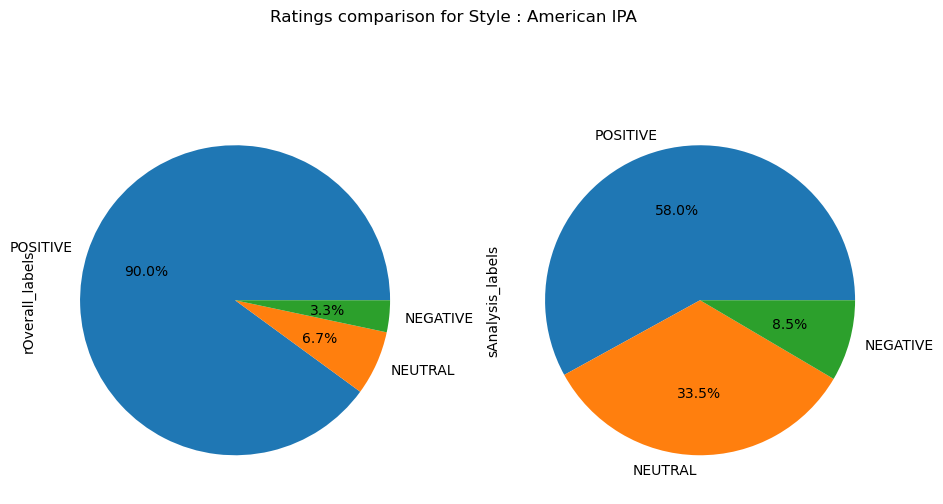

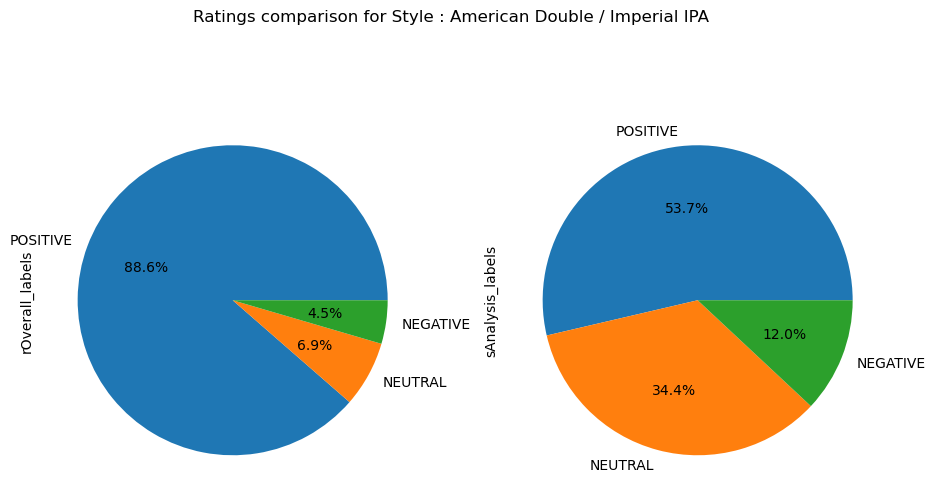

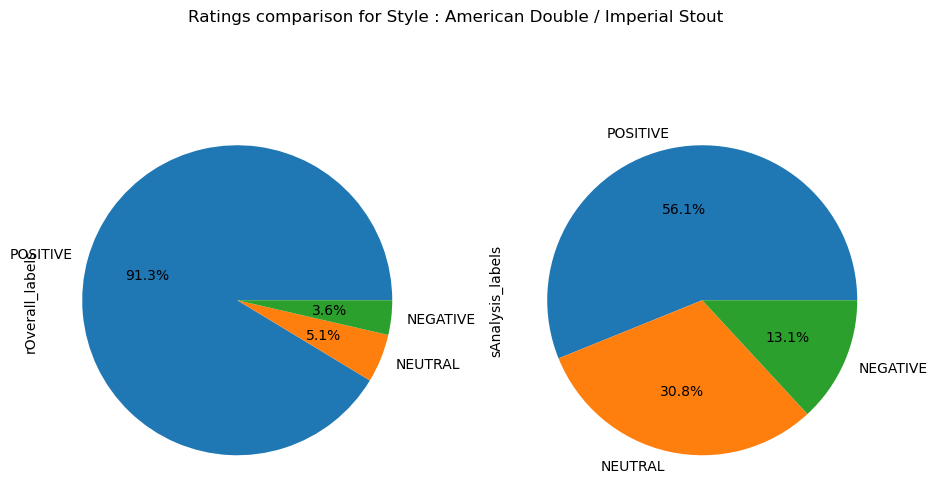

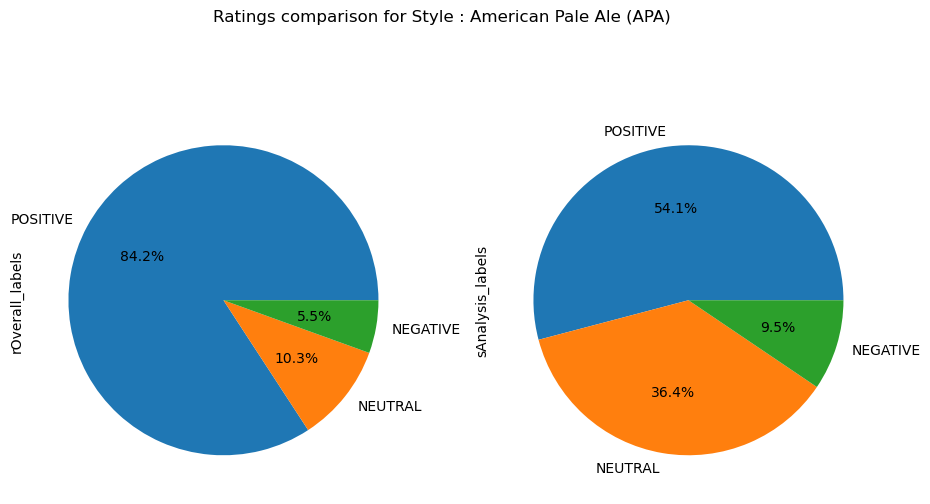

In [96]:
for style in stl_list:
    temp = beer_data.loc[beer_data['beer_style'] == style,('rOverall_labels','sAnalysis_labels')]
    a=temp['rOverall_labels'].value_counts()
    b=temp['sAnalysis_labels'].value_counts()

    df = pd.DataFrame({'rOverall_labels': list(a.values),
                       'sAnalysis_labels': list(b.values)},
                      index=list(a.index))

    df.plot.pie(subplots=True, figsize=(11, 6), autopct='%1.1f%%', legend = False,title="Ratings comparison for Style : "+style)
    plt.show()
del temp,a,b

# Q7. How do find similar beer drinkers by using written reviews only?

In [9]:
#remove NA and sort values in descending order
beer_data.dropna(subset=['review_profileName'], inplace=True)
beer_data.reset_index(inplace = True, drop = True)

In [11]:
review_data = beer_data[['beer_name','review_profileName','cleanedText','review_time']]

In [12]:
review_data.shape

(523758, 4)

In [13]:
#consider users who has atleast 10 reviews
per_user_reviews = review_data.review_profileName.value_counts()
per_user_reviews.quantile(q=[0.72,0.80,0.90,0.95,0.99,1])

0.72      10.00
0.80      19.00
0.90      53.50
0.95     114.00
0.99     339.15
1.00    1845.00
Name: review_profileName, dtype: float64

In [14]:
review_data = review_data.groupby("review_profileName").filter(lambda x: len(x) >= 10)
review_data.head(3)

,beer_name,review_profileName,cleanedText,review_time
0,Samuel Adams Triple Bock,Todd,blue bottl gold letter come nice brief histori...,1998-01-10 00:00:01
1,Samuel Adams Cream Ale,Jason,pint tap samuel adam brewhous boylston boston ...,1998-01-28 00:00:01
2,Sierra Nevada Bigfoot Barleywine Style Ale,BeerAdvocate,short brown twist cap bottl mountain landscap ...,1998-02-06 00:00:01


In [15]:
per_user_reviews = review_data.review_profileName.value_counts()
per_user_reviews.quantile(q=[0.0,0.80,0.90,0.95,0.99,1])

0.00      10.00
0.80     101.00
0.90     180.00
0.95     279.00
0.99     583.54
1.00    1845.00
Name: review_profileName, dtype: float64

In [16]:
#sort by time and get latest 10 reviews of each profile to reduce computation.
review_data.sort_values('review_time',ascending= False,inplace=True)
review_data.reset_index(inplace = True, drop = True)

In [17]:
review_data = review_data.groupby('review_profileName').head(10).reset_index(drop=True)

In [18]:
review_data.shape

(64740, 4)

In [19]:
########################## writing data to save changes ##########################
#Saving data used for filtering
review_data.to_csv('data/review_filt_clustering.csv', index=False)

### Avg W2v

In [55]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import numpy as np
from tqdm import tqdm
import pickle

In [56]:
list_of_sent=[]

In [57]:
# extract review text sentences
for sent in review_data['cleanedText'].values:   #extract sentences to apply created w2v model
    list_of_sent.append(sent.split())

In [58]:
#avg w2v model
w2v_model = Word2Vec(list_of_sent,min_count=5,vector_size=50, workers=4) #min_count-word should have min this many count to be included in w2v, size- n X 50

In [184]:
def avg_w2v(data,filename):
    # average Word2Vec
    # compute average word2vec for each review.
    sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sent in tqdm(data): # for each review/sentence
        sent_vec = np.zeros(50) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            try:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
            except KeyError:
                pass 
        if cnt_words != 0:
            sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
    with open("data/"+filename,"wb") as file:
      pickle.dump(sent_vectors, file)

In [187]:
avg_w2v(list_of_sent,"avg_w2v.pkl")

100%|██████████████████████████████████████████████████████████████████████████| 64740/64740 [00:10<00:00, 6282.32it/s]


In [59]:
with open("models/"+"w2v_model.pkl","wb") as file:
  pickle.dump(w2v_model, file)

### Applying DBSCAN on AVG W2V

In [20]:
# read vectors stored in pickle file
with open("data/avg_w2v.pkl","rb") as file:
  sent_vect = pickle.load(file)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(with_mean=False)
sent_vect=scaler.fit_transform(sent_vect)

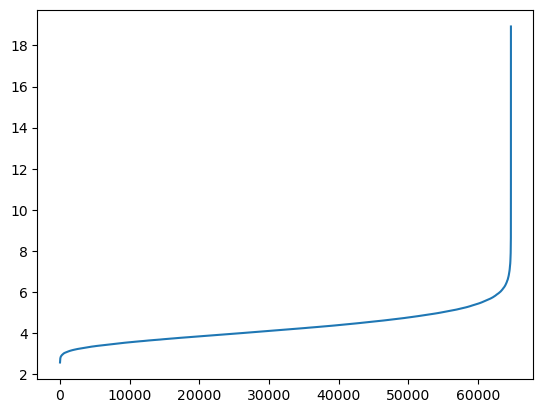

In [22]:
from sklearn.neighbors import NearestNeighbors
ns = 4
nbrs = NearestNeighbors(n_neighbors=ns).fit(sent_vect)
distances, indices = nbrs.kneighbors(sent_vect)
distanceDec = sorted(distances[:,ns-1])
plt.plot(list(range(1,len(sent_vect)+1)), distanceDec)
plt.show()

In [53]:
with open("models/"+"knn_model.pkl","wb") as file:
  pickle.dump(nbrs, file)

In [26]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=6,min_samples=100) #setting min_samples to 2Xdim
model.fit(sent_vect)

DBSCAN(eps=6, min_samples=100)

In [51]:
with open("models/"+"dbscan_model.pkl","wb") as file:
  pickle.dump(model, file)

In [27]:
core_samples = model.core_sample_indices_
labels = model.labels_

### Wordclouds of Beer drinkers obtained after applying DBSCAN on AVG W2V

In [30]:
review_data = pd.read_csv('data/review_filt_clustering.csv', header=0)

In [43]:
# find all the datapoints belonging to particular cluster
my_dict = {i: np.where(model.labels_ == i)[0] for i in unique_labels}

In [44]:
#Get all the beer drinkers associated with that cluster
beer_drinkers = {}
for idx, val in my_dict.items():
    profiles = []
    for x in val:
        profiles.append(review_data.loc[x,'review_profileName'])
    beer_drinkers[idx] = profiles

In [46]:
from collections import Counter
from wordcloud import WordCloud

In [47]:
#Find the ones with more reviews in this cluster
cluster_drinkers = {}
for i in beer_drinkers.keys():
    top_words = {}
    c = Counter(beer_drinkers[i])
    for w, f in c.most_common(20):
        top_words[w] = f
    cluster_drinkers[i] = top_words

In [48]:
def plot_wc(word_cloud):
    plt.figure(figsize=(8,8), facecolor=None)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

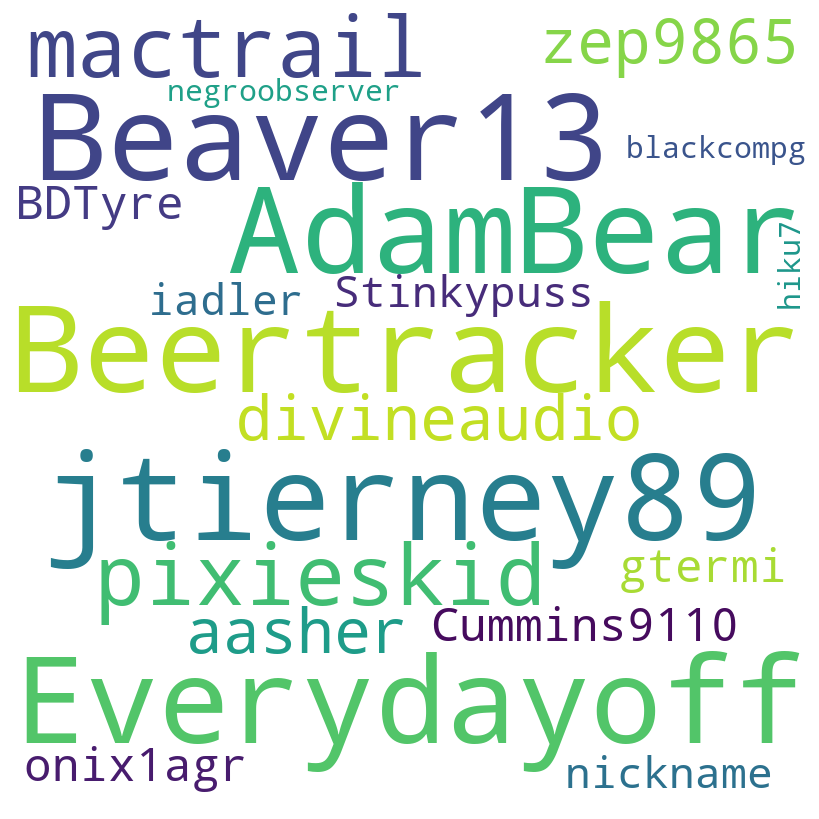

In [49]:
#Cluster 1
wc = WordCloud(width=800, height=800, background_color='white', min_font_size=10
            ).generate_from_frequencies(cluster_drinkers[0])
plot_wc(wc)

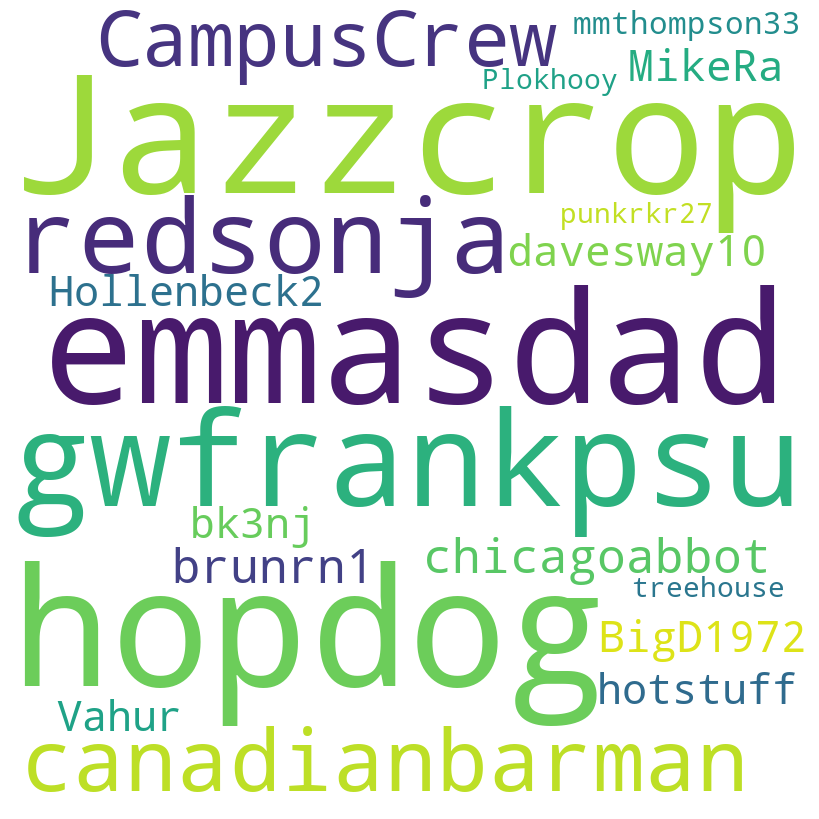

In [50]:
#cluster 2
wc = WordCloud(width=800, height=800, background_color='white', min_font_size=10
            ).generate_from_frequencies(cluster_drinkers[-1])
plot_wc(wc)